# Estimation of Obesity Levels Based On Eating Habits and Physical Conditions
Key Features: gender, age, height, weight, eating habits, physical conditon, lifestyle habits \
Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition \
The estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61

In [5]:
### Verify all libraries are installed in your machine first. 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np 
from scipy.stats import spearmanr

# Other libraries that may be useful in the future. 
# import duckdb # for using sql syntax to access a df 
# import pandasql # also for using sql to access df - have slightly different features /advantages"
# import pil # python imaging library for opening, manipulating and saving images

## Functions that may be useful. 
## %%sql

In [6]:
df = pd.read_csv("DataSets/UCI_ObesityDataSet.csv")
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Data Wrangling


- Renaming dataset columns
- Reformatting categorical data

In [ ]:
# Rename labels for easy readability and intuitive data access. 
df = df.rename(columns = {'Gender':'gender', 'Age':'age', 'Height':'height', 'Weight':'Weight','FAVC':'eat_high_calorie_frequently', 
                          'FCVC':'eat_vegetables_usually', 'NCP':'daily_meal_count', 'CAEC':'snack_between_meals', 'SMOKE':'smoke', 
                          'CH2O':'daily_water_intake', 'SCC':'monitor_calories', 'FAF':'activity_frequency', 'TUE':'time_on_technology', 
                          'CALC':'alcohol_frequency','MTRANS':'transportation', 'NObeyesdad':'obesity_level'})

# Removing underscores from Public Transportation
df['transportation'] = df['transportation'].astype('category')
df['transportation'] = df['transportation'].cat.rename_categories({'Public_Transportation': 'Public Transportation'})

# Removing unserscores from all obesity_level categories
df['obesity_level'] = df['obesity_level'].astype('category')
df['obesity_level'] = df['obesity_level'].cat.rename_categories({'Insufficient_Weight': 'Insufficient Weight',
                                                                 'Normal_Weight': 'Normal Weight',
                                                                'Overweight_Level_I': 'Overweight Level I',
                                                                'Overweight_Level_II': 'Overweight Level II',
                                                                'Obesity_Type_I': 'Obesity Type I',
                                                                'Obesity_Type_II': 'Obesity Type II',
                                                                'Obesity_Type_III': 'Obesity Type III'})

# Printing head of df
df.head()

,gender,age,height,Weight,family_history_with_overweight,eat_high_calorie_frequently,eat_vegetables_usually,daily_meal_count,snack_between_meals,smoke,daily_water_intake,monitor_calories,activity_frequency,time_on_technology,alcohol_frequency,transportation,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II


In [6]:
df.describe()

,age,height,Weight,eat_vegetables_usually,daily_meal_count,daily_water_intake,activity_frequency,time_on_technology
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Data Exploration
- Adding BMI and obese binary feature

In [7]:
# add bmi feature 
df['bmi'] = df['Weight']/(df['height']**2)

# add obese binary feature
df['obese'] = (df['bmi'] >= 25).astype(int)
df.head(20)

,gender,age,height,Weight,family_history_with_overweight,eat_high_calorie_frequently,eat_vegetables_usually,daily_meal_count,snack_between_meals,smoke,daily_water_intake,monitor_calories,activity_frequency,time_on_technology,alcohol_frequency,transportation,obesity_level,bmi,obese
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.386526,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.238227,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.765432,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.851852,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.342381,1
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal Weight,20.195092,0
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal Weight,24.444444,0
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public Transportation,Normal Weight,19.705532,0
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public Transportation,Normal Weight,20.199470,0
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public Transportation,Normal Weight,22.985398,0


# Correlation Matrix

In [1]:
def df_spearmans(df_input):
    df = df_input.drop(columns=['gender', 'bmi', 'Weight'])

    ordinal_mappings = {
        'obesity_level':{'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3,
             'Obesity_Type_I':4, 'Insufficient_Weight':0, 'Obesity_Type_II':5,
             'Obesity_Type_III':6},
        'family_history_with_overweight': {'yes': 1, 'no': 0},  
        'eat_high_calorie_frequently': {'yes': 1, 'no': 0},  
        'smoke': {'yes': 1, 'no': 0},         
        'alcohol_frequency': {'Always':3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},  
        'snack_between_meals': {'Always':3, 'Frequently': 2, 'Sometimes': 1, 'no': 0}, 
        'monitor_calories': {'no': 0, 'yes': 1},             
        'transportation': {
            'Automobile': 4,
            'Motorbike': 3,  
            'Public_Transportation': 2,
            'Walking': 0,
            'Bike':1
        }
    }

    df['daily_water_intake'] = pd.cut(
        df['daily_water_intake'],
        bins=[0,1.5,2.5,3],
        labels=[0,1,2]
    )
    
    df['activity_frequency'] = pd.cut(
        df['activity_frequency'],
        bins=[-.1, 1, 2, 3],
        labels= [0,1,2]
    )
    
    df['time_on_technology'] = pd. cut(
        df['time_on_technology'],
        bins=[-.1, .5, 1.5, 2],
        labels = [0,1,2]
    )
    
    df['age'] = pd.cut(
        df['age'],
        bins=[0,20,30,40,61],
        labels = [0,1,2,3]
    )
    
    df['height'] = pd.cut(
        df['height'],
        bins=[0, 1.6, 1.7, 1.8, df['height'].max()],
        labels=[0, 1, 2, 3]
    )
    df['eat_vegetables_usually'] = pd.cut(
        df['eat_vegetables_usually'],
        bins = [.5,1.5,2, 2.5,3],
        labels = [0,1,2,3]
    )


    for col, mapping in ordinal_mappings.items():
        df[col] = df[col].map(mapping)

    return df

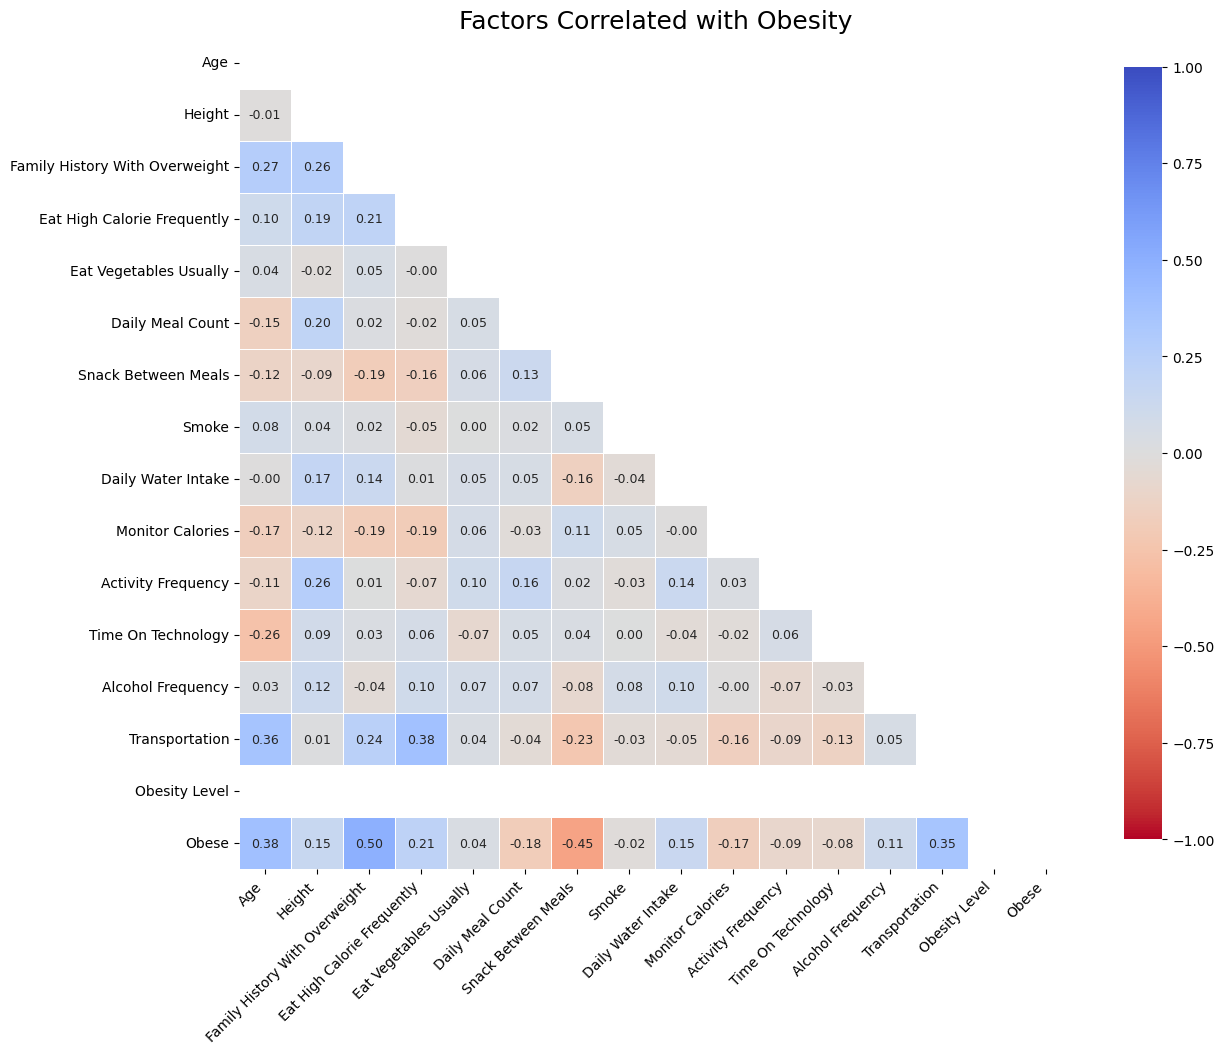

In [9]:
corr_matrix = df_spearmans(df).corr(method='spearman')

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Format labels (convert snake_case to Title Case)
formatted_labels = [label.replace('_', ' ').title() for label in corr_matrix.columns]
corr_matrix.columns = formatted_labels
corr_matrix.index = formatted_labels

# Plot
# Compute min and max correlation values for color scaling
plt.figure(figsize=(13, 11))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm_r',   # Reversed: blue for positive, red for negative
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.85}
)

plt.title("Factors Correlated with Obesity", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Relative Risk

- Relative Risk for individuals with family history of overweight and obesity

In [ ]:
# Proportion of obese individuals with family history = yes
p1 = ((df['obese'] == 1) & (df['family_history_with_overweight'] == 'yes')).sum() / \
     (df['family_history_with_overweight'] == 'yes').sum()

# Proportion of obese individuals with family history = no
p2 = ((df['obese'] == 1) & (df['family_history_with_overweight'] == 'no')).sum() / \
     (df['family_history_with_overweight'] == 'no').sum()

# Relative Risk
RR = p1 / p2

print("Relative Risk (RR):", RR)


Relative Risk (RR): 3.178039994034166


- Relative Risk for eating high calorie frequency and obesity

In [ ]:
# Proportion of obese individuals with eat_high_calories_frequently = yes
p1 = ((df['obese'] == 1) & (df['eat_high_calorie_frequently'] == 'yes')).sum() / \
     (df['eat_high_calorie_frequently'] == 'yes').sum()

# Proportion of obese individuals with eat_high_calorie_frequently = no
p2 = ((df['obese'] == 1) & (df['eat_high_calorie_frequently'] == 'no')).sum() / \
     (df['eat_high_calorie_frequently'] == 'no').sum()

# Relative Risk
RR = p1 / p2

print("Relative Risk (RR):", RR)

Relative Risk (RR): 1.9353229159680772


- Relative Risk for monitoring calories and obesity

- Relative Risk for individuals with family history of overweight and obesity

In [ ]:
# Proportion of obese individuals with eat_high_calories_frequently = yes
p1 = ((df['obese'] == 1) & (df['eat_high_calorie_frequently'] == 'yes')).sum() / \
     (df['eat_high_calorie_frequently'] == 'yes').sum()

target_obesity_levels = ['Obesity Type I', 'Obesity Type II', 'Obesity Type III']

# Relative Risk
RR = p1 / p2

print("Relative Risk (RR):", RR)

Relative Risk (RR): 1.6269397455613028


# Plotting variables with respect to obesity level

In [ ]:
sns.set(style="whitegrid", palette="muted") #Ensures that models are plotting categories in the correct order 
obesityOrder = ['Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III']

### Family History with Obesity vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Family History with Overweight', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Family History of Overweight', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Family History of Overweight', fontsize=16)
plt.ylabel('Family History with Overweight', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### High Calorie Food Consumption vs Obesity Level

In [42]:
counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Eat High Calorie Food', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by High Calorie Food Intake', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by High Calorie Food Consumption', fontsize=16)
plt.ylabel('High Calorie Food Consumption', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### How Often Individuals Eat Vegetables vs Obesity Level (Needs to be fixed)

In [ ]:
# How often an individual eats vegetables vs obesity level
plt.figure(figsize=(15, 6))

veg_bins = pd.cut(df['eat_vegetables_usually'], bins=3, labels=["Low (0,1]", "Medium (1,2]", "High (2,3]"])
sns.boxplot(data=df, x='obesity_level', y='eat_vegetables_usually',order=obesityOrder)
plt.title('Obesity Score vs Vegetable Eating Frequency', fontsize=16)
plt.xlabel('Vegetable Eating Frequency', fontsize=12)
plt.ylabel('Obesity Score', fontsize=12)
plt.tight_layout()
plt.show()

sns.countplot(data=df, x=veg_bins, hue='obesity_level')
plt.title('Obesity Score vs Vegetable Eating Frequency', fontsize=16)
plt.xlabel('Vegetable Eating Frequency', fontsize=12)
plt.ylabel('Number of individuals', fontsize=12)
plt.tight_layout()
plt.show()


### Daily Meal Conut vs Obesity Level

In [ ]:
# daily meal count vs obesity level
#heatmap
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='obesity_level', y='daily_meal_count')
plt.show()

df['daily_meal_count'] = pd.cut(df['daily_meal_count'], bins=4, labels=["(0,1]", "(1,2]", "(2,3]", "(3,4]"])
binOrder = ["(0,1]", "(1,2]", "(2,3]", "(3,4]"]
crosstab = pd.crosstab(df['daily_meal_count'],df['obesity_level'], normalize='all')
sns.heatmap(data=crosstab, annot=True, cmap='YlGnBu', fmt='.1%', linewidths=.5)
# Title and labels
plt.title('Daily Meal Count vs Obesity Level', fontsize=16)
plt.xlabel('Daily Meal Count', fontsize=12)
plt.show()

sns.set(style="whitegrid", palette="muted")
# Create a barplot to show the daily meal count distribution by obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='daily_meal_count', hue='obesity_level', palette='Set2')

# Title and labels
plt.title('Daily Meal Count Distribution by Obesity Level', fontsize=16)
plt.xlabel('Daily Meal Count', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)
plt.show()


### Snack between meals vs obesity score

In [ ]:
counts = (
    df
    .groupby(['snack_between_meals', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Snack Between Meals', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Snack Between Meals', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['snack_between_meals', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 10))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Snack Between Meals', fontsize=16)
plt.ylabel('Snack Between Meals', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### If an Individual Smokes vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['smoke', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Smokes', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Smoking', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['smoke', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Smoking', fontsize=16)
plt.ylabel('Smokes', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### Water Intake vs Obesity Level

In [ ]:
# Create a barplot to show the daily meal count distribution by obesity level
plt.figure(figsize=(15, 6))
           
sns.boxplot(data=df, x='obesity_level', y='daily_water_intake',palette='Set2')
plt.show()

plt.figure(figsize=(8, 6))
df['daily_water_intake'] = pd.cut(df['daily_water_intake'], bins=3, labels=["(0,1]", "(1,2]", "(2,3]"])

sns.countplot(data=df, x='daily_water_intake', hue='obesity_level', palette='Set2')
# Title and labels
plt.title('Daily water intake vs Obesity Level', fontsize=16)
plt.xlabel('Daily water intake', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)
plt.show()

### Counting Calories vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Monitors Calories', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Monitors Calories', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Monitors Calories', fontsize=16)
plt.ylabel('Monitors Calories', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### Activity Frequency vs Obesity Level

In [99]:

# Create a barplot to show the daily meal count distribution by obesity level

plt.figure(figsize=(8, 6))
df['activity_frequency'] = pd.cut(df['activity_frequency'], bins=3, labels=["(0,1]", "(1,2]", "(2,3]"])
sns.countplot(data=df, x='activity_frequency', hue='obesity_level', palette='Set2')

# Title and labels
plt.title('Activity Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Activity Frequency', fontsize=12)
plt.xlabel('Number of individuals', fontsize=12)
plt.tight_layout()
plt.show()

#heatmap
crosstab = pd.crosstab(df['activity_frequency'],df['obesity_level'])
sns.heatmap(data=crosstab, annot=True, cmap='YlGnBu', fmt='d')

# Title and labels
plt.title('Activity Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Activity Frequency', fontsize=12)
plt.show()

sns.boxplot(data=df, x='activity_frequency', y='obesity_level', palette='Set2')
plt.show()



### Time on Technology vs Obesity Level

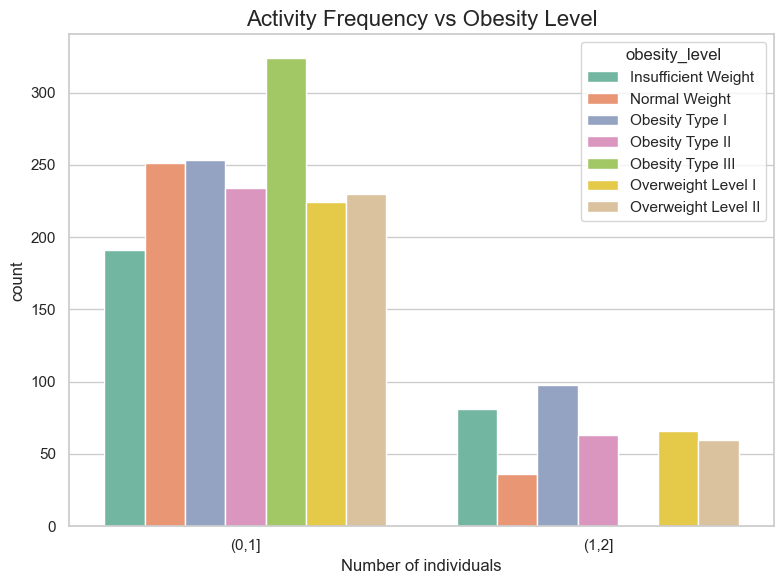

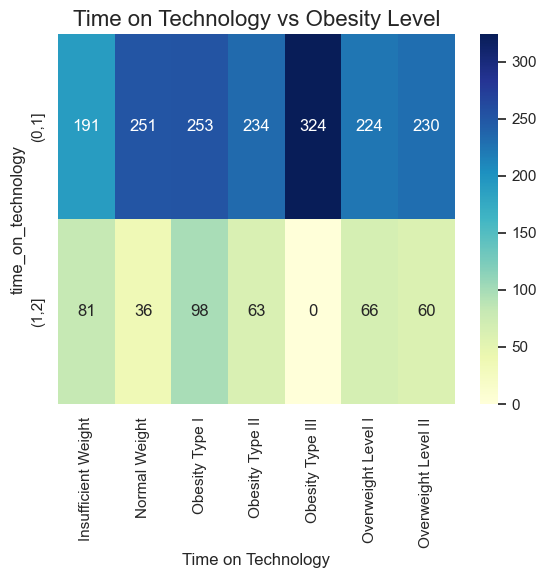

In [119]:

# Create a barplot to show the daily meal count distribution by obesity level
plt.figure(figsize=(8, 6))
df['time_on_technology']= pd.cut(df['time_on_technology'], bins=2, labels=["(0,1]", "(1,2]"])
sns.countplot(data=df, x='time_on_technology', hue='obesity_level', palette='Set2')

# Title and labels
plt.title('Activity Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Time on Technology', fontsize=12)
plt.xlabel('Number of individuals', fontsize=12)
plt.tight_layout()
plt.show()

#heatmap
crosstab = pd.crosstab(df['time_on_technology'],df['obesity_level'])
sns.heatmap(data=crosstab, annot=True, cmap='YlGnBu', fmt='d')

# Title and labels
plt.title('Time on Technology vs Obesity Level', fontsize=16)
plt.xlabel('Time on Technology', fontsize=12)
plt.show()

### Alcohol Frequency vs Obesity Level

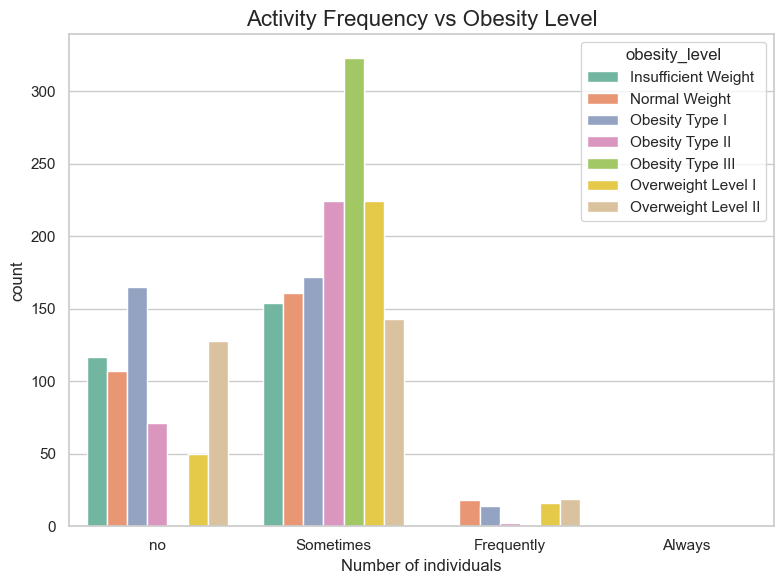

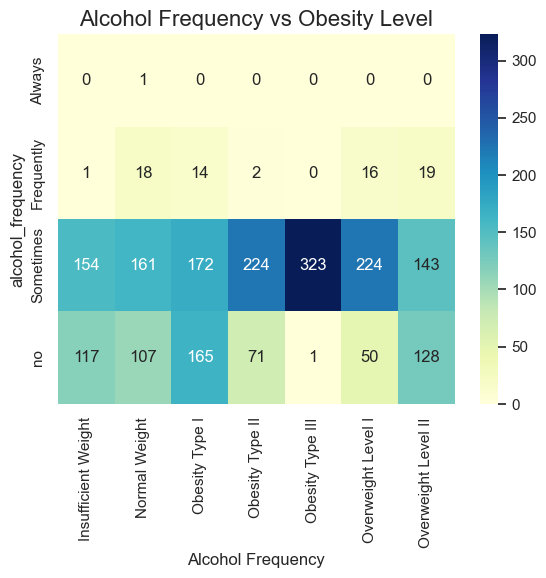

In [120]:

# Create a barplot to show the daily meal count distribution by obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='alcohol_frequency', hue='obesity_level', palette='Set2')

# Title and labels
plt.title('Activity Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Alcohol Frequency', fontsize=12)
plt.xlabel('Number of individuals', fontsize=12)
plt.tight_layout()
plt.show()

#heatmap
crosstab = pd.crosstab(df['alcohol_frequency'],df['obesity_level'])
sns.heatmap(data=crosstab, annot=True, cmap='YlGnBu', fmt='d')

# Title and labels
plt.title('Alcohol Frequency vs Obesity Level', fontsize=16)
plt.xlabel('Alcohol Frequency', fontsize=12)
plt.show()

### Transportation vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['transportation', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Transportation', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Transportation', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['transportation', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Transportation', fontsize=16)
plt.ylabel('Transportation', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

# Plots for Analysis

In [ ]:
sns.set(style="whitegrid", palette="muted") #Ensures that models are plotting categories in the correct order 
obesityOrder = ['Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III']

### Family History with Obesity vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Family History with Overweight', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Family History of Overweight', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Family History of Overweight', fontsize=16)
plt.ylabel('Family History with Overweight', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### High Calorie Food Consumption vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Eat High Calorie Food', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by High Calorie Food Intake', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by High Calorie Food Consumption', fontsize=16)
plt.ylabel('High Calorie Food Consumption', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### Counting Calories vs Obesity Level

In [ ]:
counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Monitors Calories', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Monitors Calories', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Monitors Calories', fontsize=16)
plt.ylabel('Monitors Calories', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

# Logistic Regression

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.76      0.61      0.68        57
        Obese       0.73      0.88      0.80       195
   Overweight       0.59      0.43      0.50       116

     accuracy                           0.70       368
    macro avg       0.69      0.64      0.66       368
 weighted avg       0.69      0.70      0.68       368

Log Loss: 0.7517


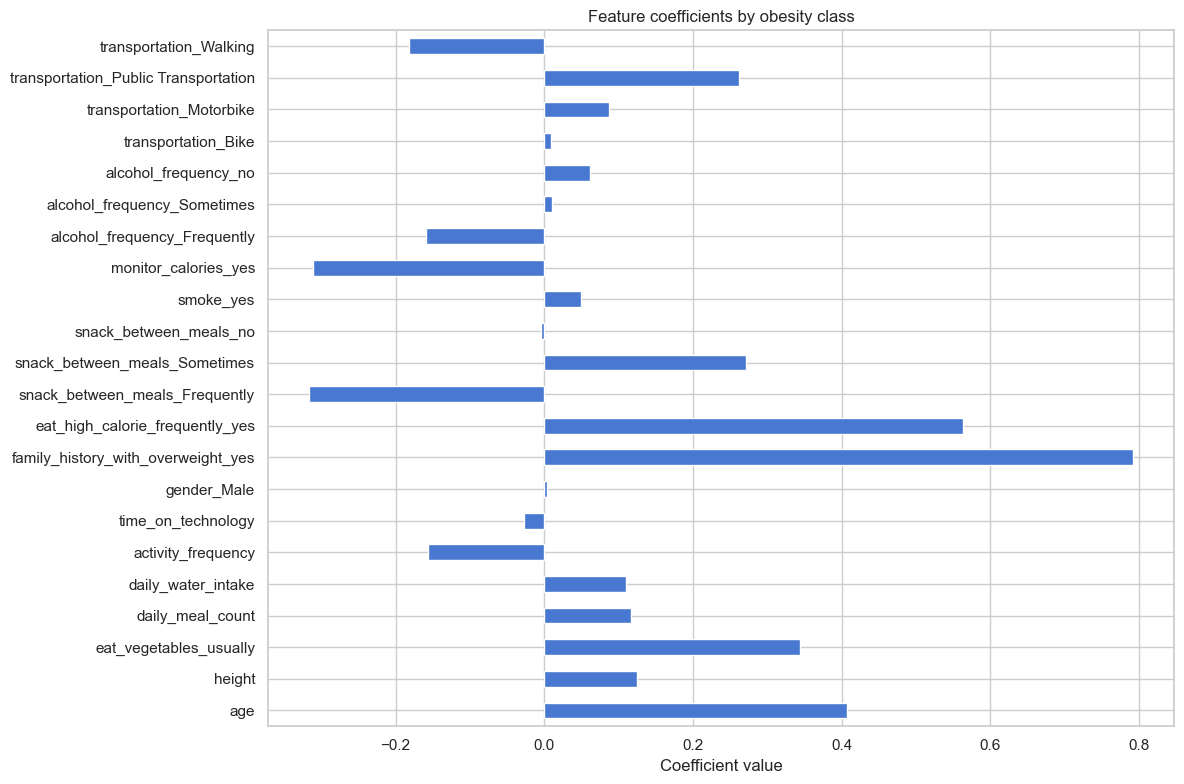


Top predictors for class 'Normal Weight':
Positive: activity_frequency                0.245183
transportation_Walking            0.166825
smoke_yes                         0.123781
monitor_calories_yes              0.062260
snack_between_meals_Frequently    0.057026
Negative: family_history_with_overweight_yes   -0.638061
snack_between_meals_Sometimes        -0.619640
age                                  -0.583488
eat_high_calorie_frequently_yes      -0.345902
snack_between_meals_no               -0.269205

Top predictors for class 'Obese':
Positive: family_history_with_overweight_yes    0.791610
eat_high_calorie_frequently_yes       0.563415
age                                   0.406817
eat_vegetables_usually                0.344273
snack_between_meals_Sometimes         0.270988
Negative: snack_between_meals_Frequently   -0.315697
monitor_calories_yes             -0.310844
transportation_Walking           -0.182472
alcohol_frequency_Frequently     -0.159573
activity_frequency       

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, log_loss

# Copy dataframe and group obesity levels
df2 = df.copy()


obesity_groups = {
    'Normal Weight': 'Normal Weight',
    'Overweight Level I': 'Overweight',
    'Overweight Level II': 'Overweight',
    'Obesity Type I': 'Obese',
    'Obesity Type II': 'Obese',
    'Obesity Type III': 'Obese'
}
df2['obesity_level'] = df2['obesity_level'].map(obesity_groups)
df2 = df2.dropna(subset=['obesity_level'])

# Separate features (X) and target (y)
X = df2.drop('obesity_level', axis=1)
y = df2['obesity_level']

# Convert categorical features to dummy variables (excluding target)
X_encoded = pd.get_dummies(X, drop_first=True)

for col in ['Age', 'Height', 'Weight']:
    if col in X_encoded.columns:
        X_encoded = X_encoded.drop(col, axis=1)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiclass logistic regression model
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Suitable for multinomial loss
    max_iter=1000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Log Loss: {log_loss(y_test, y_prob):.4f}")

# Plot feature coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X_encoded.columns,columns=model.classes_ )
obese_coefs = coefficients['Obese']
obese_coefs.plot.barh(figsize=(12,8))
plt.title("Feature coefficients by obesity class")
plt.xlabel("Coefficient value")
plt.tight_layout()
plt.show()

# Print top predictors for each class
for i, class_name in enumerate(model.classes_):
    class_coef = model.coef_[i]
    coefficients = pd.Series(class_coef, index=X_encoded.columns)
    print(f"\nTop predictors for class '{class_name}':")
    print("Positive:", coefficients.nlargest(5).to_string())
    print("Negative:", coefficients.nsmallest(5).to_string())